# **Análise e limpeza de dados**

## Importando as Bibliotecas e criando o DataFrame
Comecei importando as bibliotecas principais para a análise e criei o dataframe com o arquivo .csv que contém informações de músicas do spotify, defini como index a primeira coluna e printei as primeiras cinco linhas:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('spotify.csv', index_col=0)
df.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574


## Duplicatas

Removi do dataframe qualquer duplicata presente:

In [0]:
df = df.drop_duplicates()

## Informações do DataFrame
Em seguida, printei as informações do dataframe

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14932 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14932 non-null  object 
 1   song_popularity   14932 non-null  object 
 2   song_duration_ms  14932 non-null  object 
 3   acousticness      14932 non-null  object 
 4   danceability      14932 non-null  object 
 5   energy            14932 non-null  object 
 6   instrumentalness  14932 non-null  object 
 7   key               14932 non-null  float64
 8   liveness          14932 non-null  object 
 9   loudness          14932 non-null  object 
 10  audio_mode        14932 non-null  object 
 11  speechiness       14932 non-null  object 
 12  tempo             14932 non-null  object 
 13  time_signature    14932 non-null  object 
 14  audio_valence     14931 non-null  float64
dtypes: float64(2), object(13)
memory usage: 1.8+ MB


## Limpeza por coluna

### audio_valence

Comecei checando as colunas que já estão com seus dtypes bem definidos. Primeiro olhei a coluna 'audio_valence', seu valor tem que estar entre 0 e 1, então usei as funções .min e .max para ver se algum valor estava fora desse parâmetro:

In [0]:
df['audio_valence'].max() <= 1 and df['audio_valence'].min() >= 0 #tudo ok

True

### key
Já que na coluna key podemos ter valores muito diversos, não precisei mexer nem me preocupar com valores em um certo intervalo. 

### song_popularity

Então resolvi olhar mais atentamente para a primeira coluna ('song_popularity') que deve ser composta de números inteiros de 0 a 100. Para checar se os valores estão corretos vou printar os valores únicos:


In [0]:
print("song_popularity", df.song_popularity.unique())

song_popularity ['73' '66' '76' '74' '56' '80' '81' '78' '63' '75' '69' '77' '71' '62'
 '79' '13' '28' '11' '65' '70' '60' '72' '57' '64' '61' '67' '94' '98'
 '59' '87' '85' '58' '92' '83' '44' '47' '54' '49' '52' '95' '45' '38'
 '46' '53' '39' '88' '68' '37' '43' '84' '40' '41' '10' '31' '48' '24'
 '29' '51' '4' '7' '50' '42' '30' '21' '55' '14' '33' '8' '16' '34' '26'
 '15' '19' '5' '3' '22' '36' '32' '35' '9' '82' '25' '86' '12' '18' '27'
 '17' '6' '20' '0' '90' '93' '91' '89' '99' '97' '96' '1' '2' '23'
 'nao_sei' '100']


Notei que a lista possui um valor 'nao_sei' no meio dos números e que todos os números são strings e não int. Então vou substituir o valor 'nao_sei' por um número que não deve interferir na análise, no caso 0, e transformar as strings em inteiros. Depois chequei se os números estavam entre 0 e 100 com as funções .max e .min:

In [0]:
df['song_popularity'].replace('nao_sei', None, inplace=True) #substituindo
df['song_popularity'] = df['song_popularity'].astype('int') #transformei os número em int

In [0]:
df['song_popularity'].max() <= 100 and df['song_popularity'].min() >= 0

True

### danceability
Com relação as outras colunas, podemos notar algumas coisas que precisam ser alteradas, como as unidades de medidas das colunas 'danceability' e 'acousticness'. Primeiro removi a unidade mol/L da coluna 'danceability' usando a função .strip e depois transformei o dtype em float: 

In [0]:
 df['danceability'] = df['danceability'].str.strip('mol/L') #primeiro removi essa unidade

In [0]:
df['danceability'] = df['danceability'].astype('float') #transformei em float

### acousticness

Em seguida fiz a mesma coisa com a coluna 'acousticness':

In [0]:
df['acousticness'] = df['acousticness'].str.strip('kg')
df['acousticness'] = df['acousticness'].str.strip('mol/L')

In [0]:
df['acousticness'] = df['acousticness'].astype('float')

### song_duration
Depois tirei da coluna 'song_duration_ms' a medida 'kg', transformei os dados em float e verifiquei que alguns valores estavam muito abaixo do esperado para a coluna através da função .sort_values, então substitui esses valores pela mediana:



In [0]:
df['song_duration_ms'] = df['song_duration_ms'].str.strip('kg')

In [0]:
df['song_duration_ms'] = df['song_duration_ms'].astype('float')

In [0]:
df['song_duration_ms'].sort_values() # ordenando pra ver os valores estranhos

62      -1.852891e+13
1757     8.220000e-01
7119     1.200000e+04
18060    2.618600e+04
3726     3.137300e+04
             ...     
16825    8.668890e+05
3727     1.047933e+06
479      1.233666e+06
17797    1.355938e+06
18147    1.799346e+06
Name: song_duration_ms, Length: 14932, dtype: float64

In [0]:
# O valor negativo é estranho, e zero também. 
# Vou substitui-los pela mediana, já que a média está destorcida pelo numero negativo 
df.loc[df['song_duration_ms'] <= 0, 'song_duration_ms'] = df['song_duration_ms'].median()

In [0]:
# Para verificar se deu certo printei a média
df['song_duration_ms'].mean() #tudo certo! a média é 218.000 milissegundos, que é +/- 2 minutos, normal

218949.8249612912

### instrumentalness
Como próximo passo resolvi verificar a coluna 'instrumentalness', achei valores definidos como 'nao_sei' e os substitui, depois transformei o tipo de dado em float:

In [0]:
df['instrumentalness'].replace('nao_sei', None, inplace=True)

In [0]:
df['instrumentalness'] = df['instrumentalness'].astype('float')

### time_signature
Em seguida olhei a coluna 'time_signature' que possuía alguns valores únicos fora do parâmetro, então substitui os 'nao_sei' por 'none' e tirei os números grandes:

In [0]:
print("time_signature", df.time_signature.unique())

time_signature ['4' '3' '1' '5' '2800000000' 'nao_sei' '0.7' '0']


In [0]:
df['time_signature'].replace('nao_sei', None, inplace=True)
df['time_signature'].replace('2800000000', None, inplace=True)

In [0]:
df['time_signature'] = df['time_signature'].astype('float')

### speechiness
Na coluna speechiness removi os valores altos considerados estranhos e os que estavam como 'nao_sei' e transformei os dados em float:

In [0]:
df['speechiness'] = df['speechiness'].str.strip('.nao_sei')

In [0]:
df['speechiness'] = df['speechiness'].astype('float')

In [0]:
df['speechiness'].max()

97.42

In [0]:
df['speechiness'].replace(97.42, None, inplace=True)


### audio_mode

Ao tentar transformar o dtype da coluna em int notei valores como 'nao_sei' e '0.105' que são diferentes de 0 e 1 (valores exigidos pela coluna) então substitui eles por none:

In [0]:
df['audio_mode'].replace('nao_sei', None, inplace=True)
df['audio_mode'].replace('0.105', None, inplace=True)

In [0]:
df['audio_mode'] = df['audio_mode'].astype('int')

### loudness

Comecei substituindo os valores que constavam como 'nao_sei' e mudei o dtype para float. Em seguida printei os valores máximos, já que o usual é a coluna ter valores entre -60 e 0, substitui qualquer valor acima de 0 pela mediana:

In [0]:
df['loudness'].replace('nao_sei', None, inplace=True)

In [0]:
df['loudness'].max()

'1.585'

In [0]:
df['loudness'] = df['loudness'].astype('float')

In [0]:
df.loc[df['loudness'] > 0, 'loudness'] = df['loudness'].median()

### liveness

Notei o valor 'nao_sei' então substitui por none e transformei o tipo de dado em float:

In [0]:
df['liveness'].replace('nao_sei', None, inplace=True)

In [0]:
df['liveness'] = df['liveness'].astype('float')

### energy

Fiz o mesmo na coluna 'energy':

In [0]:
df['energy'].replace('nao_sei', None, inplace=True)

In [0]:
df['energy'] = df['energy'].astype('float')

### tempo
 E o mesmo na coluna 'tempo':

In [0]:
df['tempo'].replace('nao_sei', None, inplace=True)

In [0]:
df['tempo'] = df['tempo'].astype('float')

## Checando as colunas

Para checar se todas as colunas estão com seu dtype certo printei uma última vez a função .info:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14932 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14932 non-null  object 
 1   song_popularity   14932 non-null  int64  
 2   song_duration_ms  14932 non-null  float64
 3   acousticness      14932 non-null  float64
 4   danceability      14932 non-null  float64
 5   energy            14932 non-null  float64
 6   instrumentalness  14932 non-null  float64
 7   key               14932 non-null  float64
 8   liveness          14932 non-null  float64
 9   loudness          14932 non-null  float64
 10  audio_mode        14932 non-null  int64  
 11  speechiness       14932 non-null  float64
 12  tempo             14932 non-null  float64
 13  time_signature    14932 non-null  float64
 14  audio_valence     14931 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 1.8+ MB


# **Análise**

Vamos começar a análise e depois testar algumas hipóteses de correlação utilizando alguns gráficos do seaborn:

## Distribuição de notas

Vamos dar uma olhada na distribuição de notas da coluna 'song_popularity' que dá uma nota de 0 a 100 para as músicas. 

Podemos notar que a as classificações tendem a ficar na média, entre 40 e 70, notamos também muitas notas 0, o que pode ter ocorrido pdevido a limpeza do dataframe. Podemos ver, inclusive, que poucas são as músicas avaliadas acima de 80, e o gráfico diminui progressivamente conforme vai chegando perto de 100.

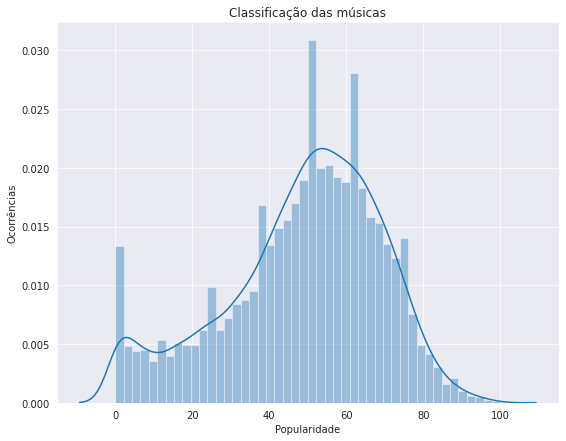

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('darkgrid')


s = sns.distplot(df['song_popularity'])
s.set_title('Classificação das músicas')
s.set(xlabel='Popularidade', ylabel='Ocorrências')
plt.show()

## Hipótese 1 - Dançabilidade 

Vamos começar olhando se existe uma relação entre a música ser dançante e sua classificação.

*Conclusão: Já que podemos notar que os valores estão bem homogêneos e distribuídos durante todo o gráfico, concluimos que não há nenhum tipo de correlação entre a nota atribuída à música e sua dançabilidade.*

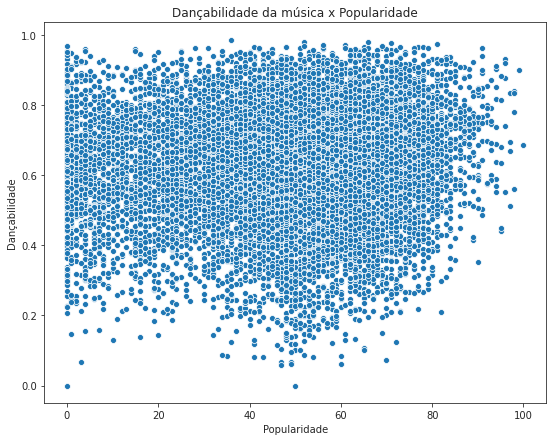

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('ticks')

sd = sns.scatterplot(x='song_popularity', y='danceability',data=df)
sd.set_title('Dançabilidade da música x Popularidade')
sd.set(xlabel='Popularidade', ylabel='Dançabilidade')
plt.show()

## Hipótese 2 - Animação

Em seguida testei a relação entre a música ser animada (positiva, feliz, alegre) e sua classificação.

*Conclusão: Os valores estão distribuídos uniformemente durante o gráfico, podemos notar apenas que poucas músicas são avaliadas acima de 90, mas não há nenhuma relação entre a música ser dançante e ser popular.*

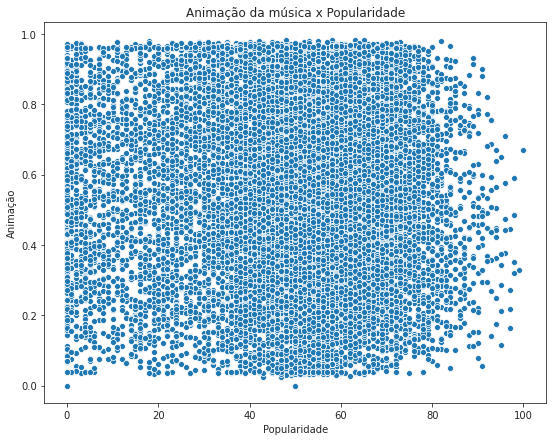

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('ticks')

a = sns.scatterplot(x='song_popularity', y='audio_valence',data=df)
a.set_title('Animação da música x Popularidade')
a.set(xlabel='Popularidade',ylabel='Animação')
plt.show()

## Hipótese 3 - Energia

Como terceira hipótese decidi relacionar a coluna referente à energia (que varia de 0 a 1 e mostra a intensidade da energia das músicas, de forma que as músicas mais perto de 1 tendem a ser mais altas, rápidas, barulhentas e intensas, como heavy metal) com a popularidade da música no spotify.

*Conslusão: Com a análise do gráfico notei apenas que músicas com uma energia maior que 0.4 costumam ser mais comuns e avaliadas e que músicas abaixo desse parâmetro costumam ficar na média da avaliação, entre 40 e 70, mas que não há nenhum tipo de correlação entre eles.*

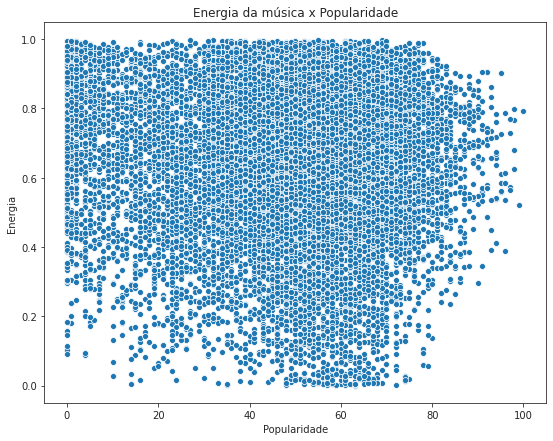

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('ticks')


e = sns.scatterplot(x='song_popularity', y='energy',data=df)
e.set_title('Energia da música x Popularidade')
e.set(xlabel='Popularidade',ylabel='Energia')
plt.show()

## Hipótese 4 - Duração

Comparei também a popularidade da música com a sua duração.

*Conclusão: Embora o gráfico tenha deixado claro a média de tempo das músicas e que poucas são as que destoam dessa média, não revelou mais nenhuma correlação já que podemos ver músicas com certas variações de tempo bem distribuídas ao longo das notas de popularidade.*

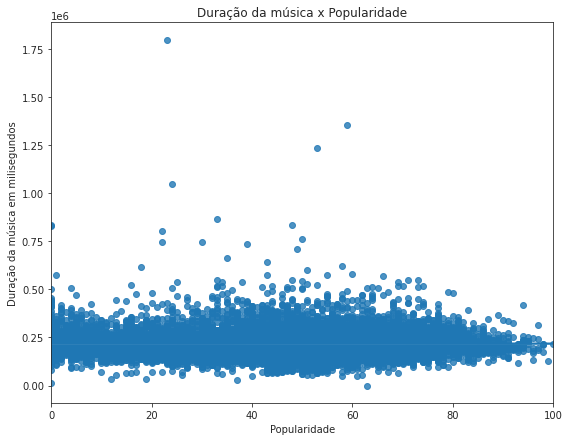

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('ticks')

d = sns.regplot(x='song_popularity', y='song_duration_ms',data=df)
d.set_title('Duração da música x Popularidade')
d.set(xlabel='Popularidade',ylabel='Duração da música em milisegundos')
plt.show()

##Hipótese 4 - Músicas dancáveis x energéticas

Comparei as colunas de dançabilidade e energia, para ver se músicas mais dançantes são também as músicas mais energéticas.

*Conclusão: Também não há nenhuma correlação aparente entre essas duas colunas, o gráfico mostra apenas que são poucas as músicas classificadas abaixo de 0.2 na categoria "danceability"*

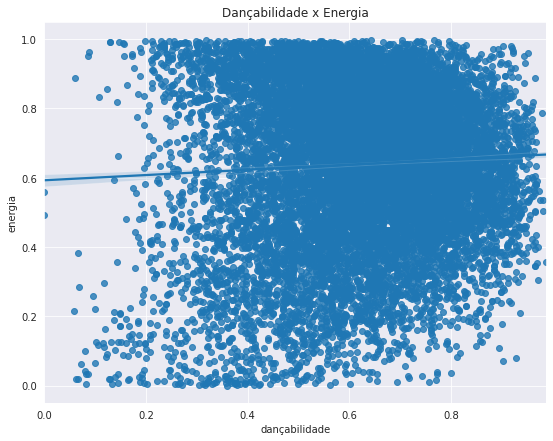

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('darkgrid')

de = sns.regplot(x='danceability', y='energy',data=df)
de.set_title('Dançabilidade x Energia')
de.set(xlabel='dançabilidade',ylabel='energia')
plt.show()

## Hipótese 5 - Músicas acústicas

Em seguida, testei a hipótese de músicas acústicas serem melhores avaliadas.

*Conclusão: Não há correlação entre a música ser acústica e ser popular.*



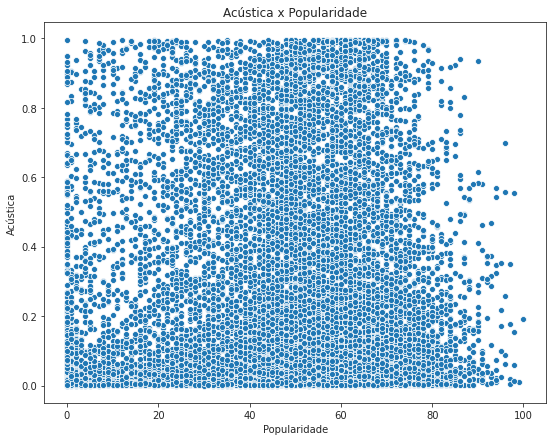

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('ticks')

ap = sns.scatterplot(x='song_popularity', y='acousticness',data=df)
ap.set_title('Acústica x Popularidade')
ap.set(xlabel='Popularidade',ylabel='Acústica')
plt.show()

## Hipótese 6 - Speechiness

Testei também a possibilidade de haver correlação entre a música ser mais "falada" e sua popularidade.

*Conclusão: Não há uma correlação aparente, podemos ver apenas que músicas mais "faladas" não são tão frequentes e todas se mantém dentro de um limite, não tendem a ultrapassar a marca de 0.5.*

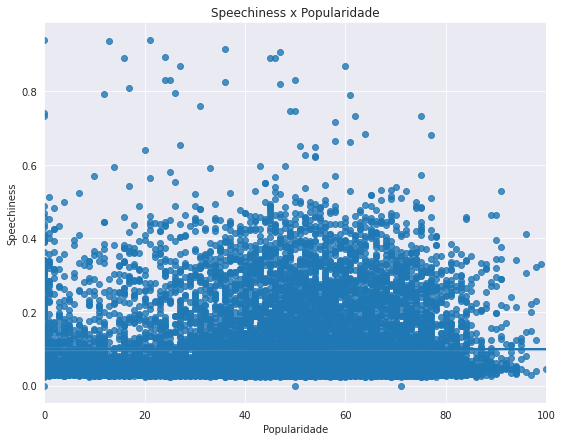

In [0]:
plt.figure(figsize=(9,7))

sns.set_style('darkgrid')
c = sns.regplot(x='song_popularity', y='speechiness',data=df)
c.set_title('Speechiness x Popularidade')
c.set(xlabel='Popularidade',ylabel='Speechiness')
plt.show()

## Testando correlações com heatmap

Já que nenhuma hipótese formulada se mostrou certa, vamos usar o heatmap das colunas para olhar atentamente cada uma das correlações.

*Conslusão: Olhando atentamente podemos perceber uma correlação mais "óbvia" entre as colunas energy x loudness, e uma correlação inversa entre as colunas energy x acousticness e loudness x acousticness, vamos explorá-las e pensar em hipóteses para essa relação.*

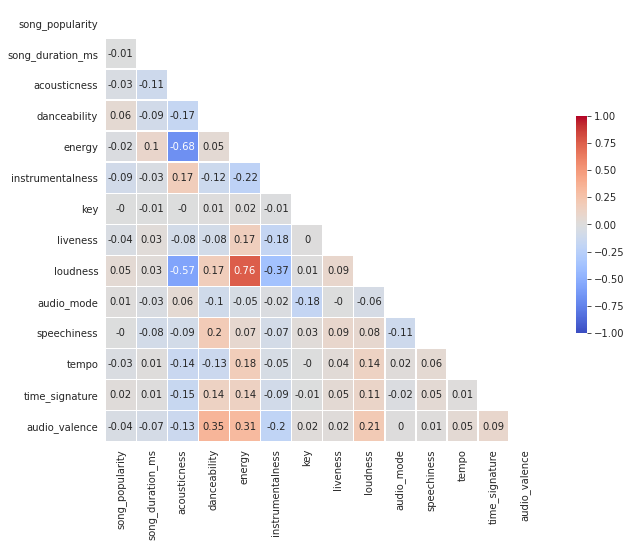

In [0]:
corr = df.corr()
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Criei o heatmap com o parâmetro mask para esconder a parte de cima, acho que assim fica mais legível
sns.heatmap(corr, vmax=1, vmin=-1, center=0,
            annot=np.round(corr.values, 2),
            cmap='coolwarm', square=True, mask=mask,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Hipótese 7 - Energia x Altura

Conforme é visível no heatmap as colunas energy e loudness se relacionam, vamos explorá-las.

*Conclusão: As duas colunas são muito correlacionadas, já que energy diz respeito a energia da música (velocidade, altura, barulho) e loudness diz respeito a altura em decibéis, é esperado que quanto mais "energética" uma música mais alta ela seja.*

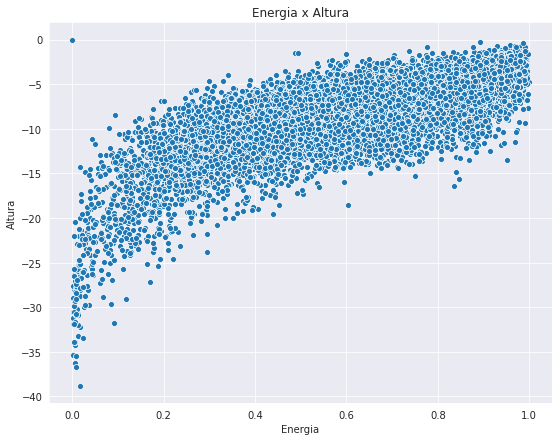

In [0]:
plt.figure(figsize=(9,7))

sns.set_style('darkgrid')
ea = sns.scatterplot(x='energy', y='loudness',data=df)
ea.set_title('Energia x Altura')
ea.set(xlabel='Energia',ylabel='Altura')
plt.show()

## Hipótese 8 - Altura x Acústica

*Conclusão: Essas duas variáveis são correlacionadas inversamente, ou seja, quanto mais acústica uma música mais baixa ela é.*

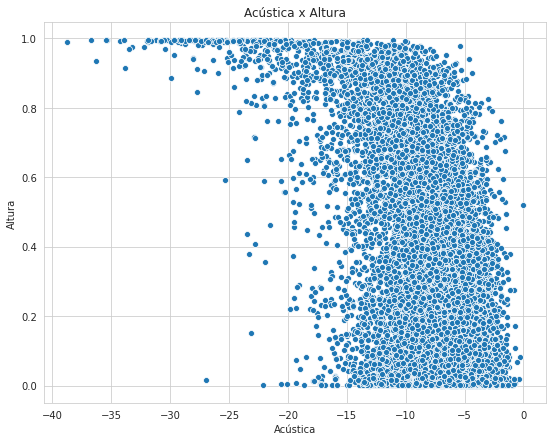

In [0]:
plt.figure(figsize=(9,7))

sns.set_style('whitegrid')
aa = sns.scatterplot(x='loudness', y='acousticness',data=df)
aa.set_title('Acústica x Altura')
aa.set(xlabel='Acústica',ylabel='Altura')


plt.show()

## Hipótese 9 - Energia x Acústica

*Conclusão: Pelo gráfico e pelo heatmap podemos perceber que as variáveis são correlacionadas inversamente, quanto mais acústica uma música menos energética ela é. Essa hipótese faz sentido quando levamos em conta que a definição da coluna 'energy' é a medida da intensidade da música, ou seja, o quão alta, barulhenta e rápida ela é. Características distintas de músicas acústicas.*

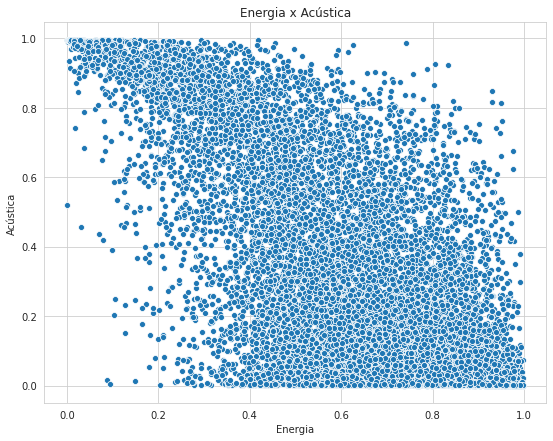

In [0]:
plt.figure(figsize=(9,7))
sns.set_style('whitegrid')

eac = sns.scatterplot(x='energy', y='acousticness',data=df)
eac.set_title('Energia x Acústica')
eac.set(xlabel='Energia',ylabel='Acústica')

plt.show()

# Análise das músicas populares

Agora vamos explorar mais atentamente as correlações entre as colunas quando isolamos apenas as músicas com uma classificação alta (acima de 80). Vamos notar quais são as características em comum que elas carregam:

### Isolando as músicas mais bem avaliadas

Para isso vou usar a função .iloc oferecida pelo pandas:

In [0]:
populares = df.loc[df['song_popularity'] >= 80, :]

populares.head()


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
5,Bring Me To Life,80,235893.0,0.008950,0.316,0.945,0.000002,4.0,0.3960,-3.169,0,0.1240,189.931,4.0,0.320
6,Last Resort,81,199893.0,0.000504,0.581,0.887,0.001110,4.0,0.2680,-3.659,0,0.0624,90.578,4.0,0.724
8,Mr. Brightside,80,222586.0,0.001080,0.330,0.936,0.000000,1.0,0.0926,-3.660,1,0.0917,148.112,4.0,0.234
9,Sex on Fire,81,203346.0,0.001720,0.542,0.905,0.010400,9.0,0.1360,-5.653,1,0.0540,153.398,4.0,0.374
13,Can't Stop,81,269000.0,0.017900,0.618,0.938,0.000000,9.0,0.1670,-3.442,1,0.0456,91.455,4.0,0.875


Vamos usar um heatmap para explorar as relações entre as colunas das músicas mais populares:

*Conclusão: Fora as colunas com correlações óbvias, como energy x loudness, não podemos ver nenhuma outra relação entre as músicas com classificação acima de 80.*

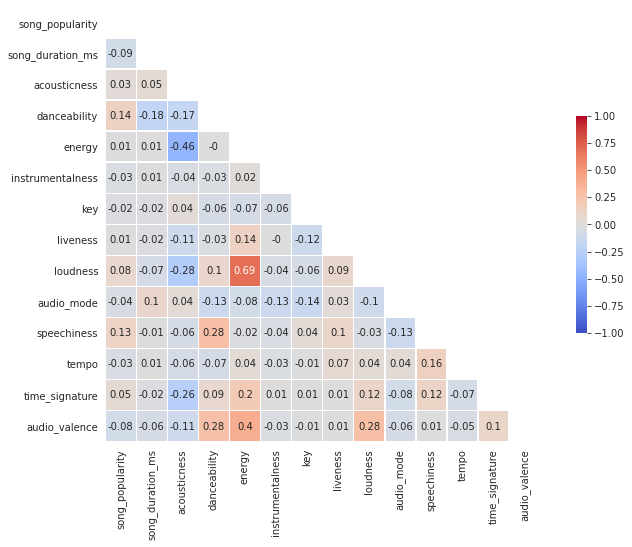

In [0]:
corr = populares.corr()
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Criei o heatmap com o parâmetro mask para esconder a parte de cima, acho que assim fica mais legível
sns.heatmap(corr, vmax=1, vmin=-1, center=0,
            annot=np.round(corr.values, 2),
            cmap='coolwarm', square=True, mask=mask,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## As duas músicas mais populares

Agora, apenas por fins de curiosidade, vamos ver quais as músicas mais bem avaliadas do nosso dataframe, com uma classificação igual ou maior que 99:

In [0]:
popular = df.loc[df['song_popularity'] >= 99, :]
popular.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1229,I Love It (& Lil Pump),99,127946.0,0.0114,0.901,0.522,0.0,2.0,0.259,-8.304,1,0.3300,104.053,4.0,0.329
4299,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5.0,0.167,-2.749,1,0.0452,100.015,4.0,0.671


# Conclusão

Neste projeto fui capaz de treinar e desenvolver melhor minhas habilidades para limpar e analisar as informações de um DataFrame. Nesse, em específico, fui capaz de ver que, exceto pelas correlações mais óbvias exploradas, as colunas disponíveis não possuem tantas relações entre si, mesmo quando explorei as músicas mais bem avaliadas. 

Isso demonstra que os ouvintes e as músicas costumam variar bastante, ou seja, as músicas mais ouvidas e populares possuem disferenças significativas entre si.